# Homework Assignment 2 - Part 3

## Lab2 4 Nhanes_univariate_practice

# Practice notebook for univariate analysis using NHANES data

This notebook will give you the opportunity to perform some univariate analyses on your own using the NHANES.  These analyses are similar to what was done in the week 2 NHANES case study notebook.

You can enter your code into the cells that say "enter your code here", and you can type responses to the questions into the cells that say "Type Markdown and Latex".

Note that most of the code that you will need to write below is very similar to code that appears in the case study notebook.  You will need to edit code from that notebook in small ways to adapt it to the prompts below.

To get started, we will use the same module imports and read the data in the same way as we did in the case study:

In [50]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np

da = pd.read_csv("https://raw.githubusercontent.com/emirmaciastec/MEM_M-todos_estadisticos/refs/heads/main/nhanes_2015_2016-1.csv")
da.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


## Question 1

Relabel the marital status variable [DMDMARTL](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDMARTL) to have brief but informative character labels.  Then construct a frequency table of these values for all people, then for women only, and for men only.  Then construct these three frequency tables using only people whose age is between 30 and 40.

In [52]:
print(da.DMDMARTL.value_counts().sum())


5474


In [54]:
# insert your code here

#da = da.rename(columns={'DMDMARTL': 'Marital Status'})
da["Marital Status"] = da.DMDMARTL
da["Gender"] = da.RIAGENDR

da['Marital Status'] = da['Marital Status'].replace({
    1.0: 'Married',
    2.0: 'Widowed',
    3.0: 'Divorced',
    4.0: 'Separated',
    5.0: 'Never married',
    6.0: 'Living with partner',
    77.0: 'Refused',
    99.0: 'Don\'t know'
})

da['Gender'] = da['Gender'].replace({
    1.0: 'Male',
    2.0: 'Female'
})

# Frequency table for all people
print("Frequency table for all people:")
display(da['Marital Status'].value_counts())

# Frequency table for women only
print("\nFrequency table for women only:")
display(da[da['RIAGENDR'] == 2]['Marital Status'].value_counts())

# Frequency table for men only
print("\nFrequency table for men only:")
display(da[da['RIAGENDR'] == 1]['Marital Status'].value_counts())

# Frequency table for people aged 30-40
print("\nFrequency table for people aged 30-40:")
age_30_40 = da[(da['RIDAGEYR'] >= 30) & (da['RIDAGEYR'] <= 40)]
display(age_30_40['Marital Status'].value_counts())

# Frequency table for women aged 30-40
print("\nFrequency table for women aged 30-40:")
women_30_40 = age_30_40[age_30_40['RIAGENDR'] == 2]
display(women_30_40['Marital Status'].value_counts())

# Frequency table for men aged 30-40
print("\nFrequency table for men aged 30-40:")
men_30_40 = age_30_40[age_30_40['RIAGENDR'] == 1]
display(men_30_40['Marital Status'].value_counts())

Frequency table for all people:


,count
Marital Status,
Married,2780
Never married,1004
Divorced,579
Living with partner,527
Widowed,396
Separated,186
Refused,2



Frequency table for women only:


,count
Marital Status,
Married,1303
Never married,520
Divorced,350
Widowed,296
Living with partner,262
Separated,118
Refused,1



Frequency table for men only:


,count
Marital Status,
Married,1477
Never married,484
Living with partner,265
Divorced,229
Widowed,100
Separated,68
Refused,1



Frequency table for people aged 30-40:


,count
Marital Status,
Married,560
Never married,217
Living with partner,143
Divorced,70
Separated,30
Widowed,5
Refused,1



Frequency table for women aged 30-40:


,count
Marital Status,
Married,285
Never married,116
Living with partner,65
Divorced,46
Separated,18
Widowed,2



Frequency table for men aged 30-40:


,count
Marital Status,
Married,275
Never married,101
Living with partner,78
Divorced,24
Separated,12
Widowed,3
Refused,1


__Q1a.__ Briefly comment on some of the differences that you observe between the distribution of marital status between women and men, for people of all ages.

__Q1b.__ Briefly comment on the differences that you observe between the distribution of marital status states for women between the overall population, and for women between the ages of 30 and 40.

__Q1c.__ Repeat part b for the men.

## Question 2

Restricting to the female population, stratify the subjects into age bands no wider than ten years, and construct the distribution of marital status within each age band.  Within each age band, present the distribution in terms of proportions that must sum to 1.

In [58]:
# Restrict to the female population
female_data = da[da['RIAGENDR'] == 2].copy()

# Create age bands (no wider than 10 years)
# Using cut to create bins for age
age_bins = range(0, female_data['RIDAGEYR'].max() + 10, 10)
female_data['AgeBand'] = pd.cut(female_data['RIDAGEYR'], bins=age_bins, right=False)

# Construct the distribution of marital status within each age band as proportions
marital_status_by_age_band_female = female_data.groupby('AgeBand', observed=False)['Marital Status'].value_counts(normalize=True).unstack()

# Display the results for females
print("Marital Status Distribution by Age Band (Females):")
display(marital_status_by_age_band_female)

# Restrict to the male population
male_data = da[da['RIAGENDR'] == 1].copy()

# Create age bands (no wider than 10 years)
age_bins = range(0, male_data['RIDAGEYR'].max() + 10, 10)
male_data['AgeBand'] = pd.cut(male_data['RIDAGEYR'], bins=age_bins, right=False)

# Construct the distribution of marital status within each age band as proportions
marital_status_by_age_band_male = male_data.groupby('AgeBand', observed=False)['Marital Status'].value_counts(normalize=True).unstack()

# Display the results for males
print("\nMarital Status Distribution by Age Band (Males):")
display(marital_status_by_age_band_male)

Marital Status Distribution by Age Band (Females):


Marital Status,Divorced,Living with partner,Married,Never married,Refused,Separated,Widowed
AgeBand,,,,,,,
"[0, 10)",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"[10, 20)",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"[20, 30)",0.016162,0.214141,0.264646,0.484848,0.000000,0.020202,0.000000
"[30, 40)",0.079002,0.130977,0.530146,0.222453,0.000000,0.033264,0.004158
"[40, 50)",0.138943,0.076321,0.569472,0.133072,0.000000,0.062622,0.019569
"[50, 60)",0.179601,0.062084,0.549889,0.086475,0.000000,0.062084,0.059867
"[60, 70)",0.183761,0.047009,0.497863,0.091880,0.002137,0.044872,0.132479
"[70, 80)",0.181818,0.007576,0.363636,0.049242,0.000000,0.034091,0.363636



Marital Status Distribution by Age Band (Males):


Marital Status,Divorced,Living with partner,Married,Never married,Refused,Separated,Widowed
AgeBand,,,,,,,
"[0, 10)",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"[10, 20)",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"[20, 30)",0.004587,0.204128,0.199541,0.573394,0.000000,0.016055,0.002294
"[30, 40)",0.044248,0.161504,0.555310,0.205752,0.002212,0.024336,0.006637
"[40, 50)",0.082090,0.092040,0.699005,0.101990,0.000000,0.019900,0.004975
"[50, 60)",0.135011,0.068650,0.640732,0.112128,0.000000,0.027460,0.016018
"[60, 70)",0.122494,0.053452,0.661470,0.089087,0.000000,0.035635,0.037862
"[70, 80)",0.150877,0.038596,0.631579,0.031579,0.000000,0.042105,0.105263


__Q2a.__ Comment on the trends that you see in this series of marginal distributions.

__Q2b.__ Repeat the construction for males.

In [ ]:
# insert your code here

__Q2c.__ Comment on any notable differences that you see when comparing these results for females and for males.

## Question 3

Construct a histogram of the distribution of heights using the BMXHT variable in the NHANES sample.

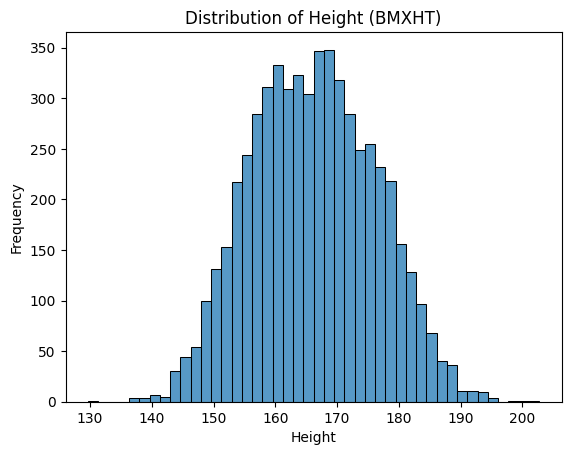

In [61]:
# Create a new column named "Height" from 'BMXHT'
da['Height'] = da['BMXHT']

# Construct a histogram of the distribution of heights using the new "Height" variable
sns.histplot(data=da, x='Height')
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.title('Distribution of Height (BMXHT)')
plt.show()

__Q3a.__ Use the `bins` argument to [distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) to produce histograms with different numbers of bins.  Assess whether the default value for this argument gives a meaningful result, and comment on what happens as the number of bins grows excessively large or excessively small.

__Q3b.__ Make separate histograms for the heights of women and men, then make a side-by-side boxplot showing the heights of women and men.

In [ ]:
# insert your code here

__Q3c.__ Comment on what features, if any are not represented clearly in the boxplots, and what features, if any, are easier to see in the boxplots than in the histograms.

## Question 4

Make a boxplot showing the distribution of within-subject differences between the first and second systolic blood pressure measurents ([BPXSY1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXSY1) and [BPXSY2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXSY2)).

In [ ]:
# insert your code here

__Q4a.__ What proportion of the subjects have a lower SBP on the second reading compared to the first?

In [ ]:
# insert your code here

__Q4b.__ Make side-by-side boxplots of the two systolic blood pressure variables.

In [ ]:
# insert your code here

__Q4c.__ Comment on the variation within either the first or second systolic blood pressure measurements, and the variation in the within-subject differences between the first and second systolic blood pressure measurements.

## Question 5

Construct a frequency table of household sizes for people within each educational attainment category (the relevant variable is [DMDEDUC2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDEDUC2)).  Convert the frequencies to proportions.

In [ ]:
# insert your code here

__Q5a.__ Comment on any major differences among the distributions.

__Q5b.__ Restrict the sample to people between 30 and 40 years of age.  Then calculate the median household size for women and men within each level of educational attainment.

In [ ]:
# insert your code here

## Question 6

The participants can be clustered into "maked variance units" (MVU) based on every combination of the variables [SDMVSTRA](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#SDMVSTRA) and [SDMVPSU](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#SDMVPSU).  Calculate the mean age ([RIDAGEYR](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIDAGEYR)), height ([BMXHT](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXHT)), and BMI ([BMXBMI](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXBMI)) for each gender ([RIAGENDR](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIAGENDR)), within each MVU, and report the ratio between the largest and smallest mean (e.g. for height) across the MVUs.

In [ ]:
# insert your code here

__Q6a.__ Comment on the extent to which mean age, height, and BMI vary among the MVUs.

__Q6b.__ Calculate the inter-quartile range (IQR) for age, height, and BMI for each gender and each MVU.  Report the ratio between the largest and smalles IQR across the MVUs.

In [ ]:
# insert your code here

__Q6c.__ Comment on the extent to which the IQR for age, height, and BMI vary among the MVUs.